**Immport dependencies**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Dataset import**

In [2]:
dataset = pd.read_csv('/content/Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**Statical Representation**

In [3]:
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
dataset.duplicated().sum()

0

In [6]:
dataset['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [7]:
dataset['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [8]:
dataset['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [9]:
dataset.drop(columns=['RowNumber','CustomerId','Surname'], inplace=True)
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
dataset = pd.get_dummies(dataset, columns=['Geography','Gender'], drop_first= True)
dataset.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [11]:
X = dataset.drop(columns=['Exited'])
Y = dataset['Exited']

**Spliting train test data**

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [13]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [14]:
Y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [15]:
X_train.shape

(8000, 11)

**Standardization**

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Create ANN Model**

In [17]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [18]:
model = Sequential()
#Hidden layer
model.add(Dense(11, activation='relu',input_dim = 11))
model.add(Dense(11, activation='relu'))
#Output layer
model.add(Dense(1, activation='sigmoid'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 11)                132       
                                                                 
 dense_2 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


**Compile model**

In [20]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [21]:
history = model.fit(X_train_scaled,Y_train, epochs=100, validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 1s 3ms/step - loss: 0.5156 - accuracy: 0.7961 - val_loss: 0.4673 - val_accuracy: 0.8037
Epoch 2/100
200/200 [==============================] - 1s 5ms/step - loss: 0.4470 - accuracy: 0.8066 - val_loss: 0.4431 - val_accuracy: 0.8050
Epoch 3/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4302 - accuracy: 0.8105 - val_loss: 0.4329 - val_accuracy: 0.8131
Epoch 4/100
200/200 [==============================] - 1s 6ms/step - loss: 0.4202 - accuracy: 0.8170 - val_loss: 0.4244 - val_accuracy: 0.8100
Epoch 5/100
200/200 [==============================] - 1s 6ms/step - loss: 0.4117 - accuracy: 0.8206 - val_loss: 0.4168 - val_accuracy: 0.8150
Epoch 6/100
200/200 [==============================] - 1s 6ms/step - loss: 0.4028 - accuracy: 0.8267 - val_loss: 0.4071 - val_accuracy: 0.8238
Epoch 7/100
200/200 [==============================] - 1s 5ms/step - loss: 0.3936 - accuracy: 0.8344 - val_loss: 0.3974 - val_accuracy: 0.8281

In [22]:
history.history

{'accuracy': [0.796093761920929,
  0.8065624833106995,
  0.8104687333106995,
  0.8170312643051147,
  0.8206250071525574,
  0.8267187476158142,
  0.8343750238418579,
  0.8423437476158142,
  0.846875011920929,
  0.8520312309265137,
  0.8548437356948853,
  0.8556249737739563,
  0.8568750023841858,
  0.856249988079071,
  0.8589062690734863,
  0.8628125190734863,
  0.8612499833106995,
  0.8634374737739563,
  0.8607812523841858,
  0.86328125,
  0.8648437261581421,
  0.8642187714576721,
  0.8628125190734863,
  0.8643749952316284,
  0.8650000095367432,
  0.8653125166893005,
  0.8643749952316284,
  0.8648437261581421,
  0.8645312786102295,
  0.8648437261581421,
  0.8670312762260437,
  0.8673437237739563,
  0.8651562333106995,
  0.8665624856948853,
  0.8665624856948853,
  0.8657812476158142,
  0.8671875,
  0.8656250238418579,
  0.8659374713897705,
  0.866406261920929,
  0.8667187690734863,
  0.8656250238418579,
  0.866406261920929,
  0.8667187690734863,
  0.8656250238418579,
  0.8656250238418579

In [23]:
model.layers[1].get_weights()

[array([[ 1.6864625e-01, -4.7511768e-01, -7.1727365e-01,  8.9680701e-02,
          4.2368934e-01, -4.6538025e-02,  7.6402038e-01, -6.1937533e-02,
          4.0402046e-01,  1.6903915e-03,  1.3447547e-02],
        [ 1.5819438e-01, -1.7938824e-01, -7.0154691e-01,  5.5001664e-01,
         -5.8496885e-02,  1.8433309e-01, -8.6841762e-02, -2.3336038e-01,
          4.6662289e-01,  2.4048159e-01,  8.8205680e-02],
        [-4.6505603e-01,  7.9514486e-01,  1.2451226e-02, -1.9122253e-01,
         -5.4109246e-01,  2.6075569e-01, -9.0919584e-01,  2.1277879e-01,
         -6.0080957e-02, -9.3098801e-01,  4.6166435e-01],
        [ 3.4016880e-01,  4.1841468e-01, -7.6249760e-01, -3.8115907e-01,
         -1.8848628e-01,  2.8997853e-01, -1.3250643e+00,  1.5320243e-01,
         -4.6478782e-02,  2.2034246e-01,  3.4591725e-01],
        [ 9.1035711e-03,  7.5343752e-01,  3.7784722e-01, -7.2571528e-01,
          3.1908774e-01, -5.0587386e-01,  4.1943905e-01, -5.5722129e-01,
         -3.6717907e-01, -2.3112540e+0

**Prediction**

In [24]:
y_log = model.predict(X_test_scaled)

In [25]:
y_pred = np.where(y_log>0.5,1,0)

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.8665

**Graph**

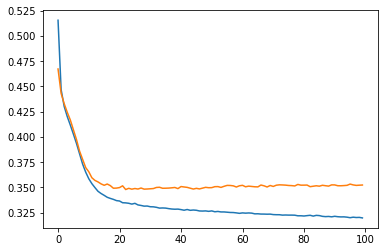

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

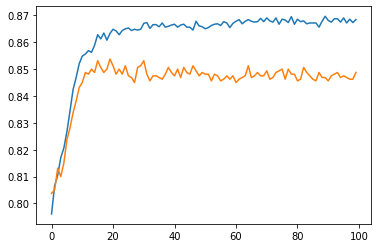

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])